# Problem: Titanic - Machine Learning from Disaster

## The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, is builded a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class etc).

## The Question

What sorts of people were more likely to survive?

## The Objective

Predict survival on the Titanic.

# Library Import

In [61]:
import numpy as np
import pandas as pd
import pandas_profiling

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection

# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.model_selection import KFold

%matplotlib inline

# disable warnings:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# Data Collect

## Titanic Dataset Importing

In [62]:
# Titanic Dataset Importing (Kaggle)
target = pd.read_csv("gender_submission.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## Explore Features

### train

In [63]:
# Inspection of the number of rows and columns of train
train.shape

(891, 12)

In [64]:
# Shows first samples of train 
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
# Summary statistics of train
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


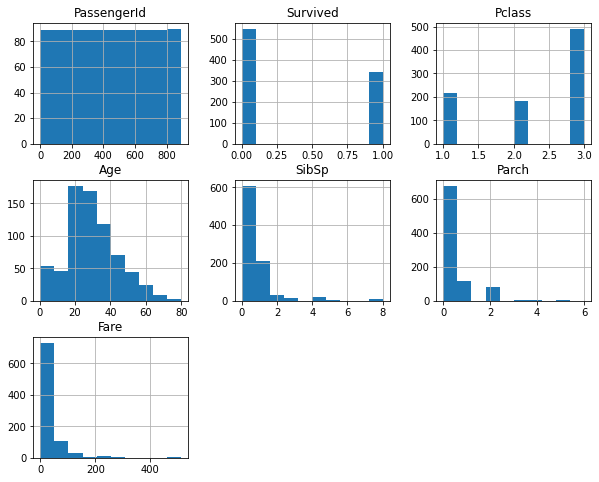

In [66]:
# Shows histogram of variable of train
train.hist(figsize=(10,8));

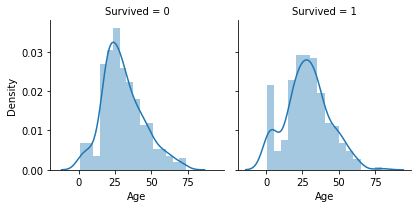

In [67]:
# Shows histogram of Age vs Survived
age_survived = sns.FacetGrid(train, col='Survived')
age_survived.map(sns.distplot, 'Age')

**Comments**

* It is possible to observe that small children have a greater chance of survival.

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

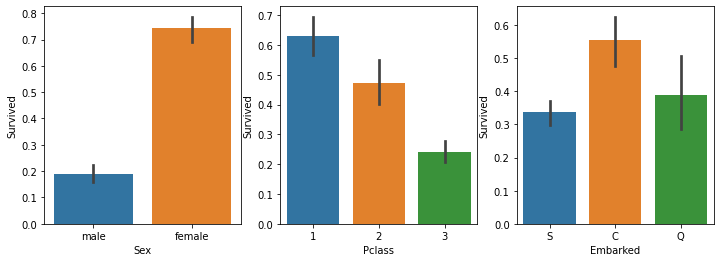

In [68]:
# Shows histograms of Survived vs Sex, Pclass and Embarked
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(12,4))
sns.barplot(x='Sex', y='Survived', data=train, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=train, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=train, ax=axis3)

**Comments**

* It is also possible to observe that women have a much greater probability of survival than men.


* And that the first class people save more than those of the first class. 

In [69]:
# Shows data types of train feature (which are the same as test)
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [70]:
# train Profile Report 
#pandas_profiling.ProfileReport(train)

**Comments** 

1. There are **5 numerical features**: PassengerId, Age, SibSp, Parch and Fare    
    
    - Continuous: Age and Fare
    - Discreet: PassengerId, SibSp and Parch


2. There are **7 categorical features**: Survived, Pclass, Name, Sex, Ticket, Cabin and Embarked  
    
    - Binary: Survived and Sex
    - Ordinal: Pclass 
    - Nominal: Name (only text), Ticket (numerical + text), Cabin (numerical + text) and Embarked (only text)

### test

In [71]:
# Inspection of the number of rows and columns of test
test.shape

(418, 11)

In [72]:
# Shows first samples of test
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [73]:
# Summary statistics of test
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


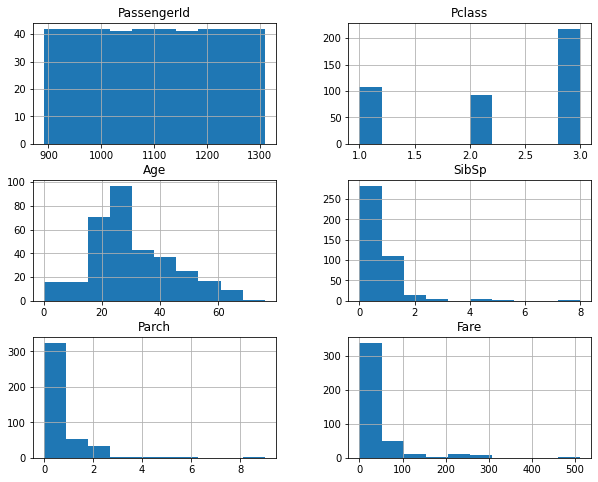

In [74]:
# Shows histogram of variable of test
test.hist(figsize=(10,8));

In [75]:
# Shows data types of test feature (which are the same as train)
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [76]:
# test Profile Report 
#pandas_profiling.ProfileReport(test)

## Explore Target Feature

In [77]:
# Inspection of the number of rows and columns of target
target.shape

(418, 2)

In [78]:
# Shows first samples of target 
target.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


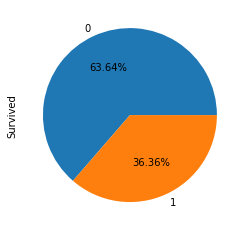

In [79]:
# To Ckeck
target['Survived'].value_counts().plot.pie(autopct='%1.2f%%');

# Data pre-processing

## Data Cleaning 

### Missing Values

#### Filtering Out Missing Values

In [80]:
# Shows the number of missing data in each column of train
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [81]:
# Shows the number of missing data in each column of test
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [82]:
# Shows the number of missing data in each column of target
target.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

**Comments**

The columns with missing values be **Age**, **Cabin** and **Embarked** in ***train*** and **Age**, **Cabin** and **Fare** in ***test***

#### Filling In Missing Values 

As the maiory of values  of column **Cabin** is missing, is possible discard this column (exclusion performed in the step of ***Data Reduction***), although other techniques can be applied. In this case, will be filled only it columns **Age**, **Fare** and **Embarked**.

##### Feature: Embarked

As the amount of data missing in the column 'Embarked' is insignificant, the missing values will fill with the value more frequently in the column.

In [83]:
# Count the frequency of values in column 'Embarked'
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [84]:
# Fills the missing values with 'S'
train['Embarked'].fillna('S', inplace=True)

# Alternative command (To check):
#train['Embarked'] = train['Embarked'].fillna('S')
#train['Embarked'].fillna(train['Embarked'].value_counts()[0], inplace=True) # With error

# Verification:
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

##### Feature: Fare

Of similar form to column 'Embarked', the amount of data missing in the column 'Fare' is small and, in this case, will be fill with the median value of this column.

In [85]:
# Fills the missing values with the median of column
test['Fare'].fillna(test['Fare'].median(), inplace=True)

# Alternative command (To Check):
#test['Fare'] = test['Fare'].fillna(test['Fare'].median())

# Verification:
test.Fare.isnull().sum()

0

##### Feature: Age

Other techniques can be used, but here will be impute the median of values presents in position of the null values.

In [86]:
# Fills the missing values with the present values median of column
train['Age'] = np.where(train.Age.isnull(), train['Age'].median(), train['Age']) 

# Alternative command (To Check):
#train['Age'].fillna(train['Age'].median, inplace=True)

# Verification: 
train.Age.isnull().sum()

0

In [87]:
# Fills the missing values with the present values median of column
test['Age'] = np.where(test.Age.isnull(), test['Age'].median(), test['Age']) 

# Alternative command:
#test['Age'].fillna(test['Age'].median, inplace=True)

# Verification: 
test.Age.isnull().sum()

0

In [88]:
#Features with Outliers (4.1.2.1)

# Check Outliers in Pclass
#sns.boxplot(train.Pclass) #Alternative: boxplot = train.boxplot(grid=False, column=['Age'])

# Check Outliers in Age
#sns.boxplot(train.Age)

# Check Outliers in SibSp
#sns.boxplot(train.SibSp)

# Check Outliers in Parch
#sns.boxplot(train.Parch)

# Check Outliers in Fare
#sns.boxplot(train.Fare)

## Data Reduction

### Dimensionality Reduction

**Comments**

* As already noted in the  ***Data Cleaning (subtopic Missing Values)*** step, the majority of values of the column **Cabin** is missing, so it will be discarded.

* As NLP (Natural Language Processing) will not be used and data will not be extracted from text columns, the **Name** and **Ticket** columns will not be considered in this solution. 

* As the id is not used in this implementation, the **PassengerId** columns will be excluded from train, test and target. 

#### train

In [89]:
# Shows train
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
# Delete the column "Cabin" of train
train = train.drop(columns=['Cabin'])

# Delete the columns "Name" e "Ticket" of train
train = train.drop(columns=['Name', 'Ticket'])          

# Delete the column "PassengerId" of train, test and target
train = train.drop(columns=['PassengerId'])

In [91]:
# Shows train
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [92]:
# Shows test
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### test

In [93]:
# Delete the column "Cabin" of test
test = test.drop(columns=['Cabin'])

# Delete the columns "Name" e "Ticket" of test        
test = test.drop(columns=['Name', 'Ticket'])    

# Delete the column "PassengerId" of test
test = test.drop(columns=['PassengerId'])

In [94]:
# Shows test
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


#### target

In [95]:
# Create variable passegerId
passegerId = target['PassengerId']

# Delete the column "PassengerId" of target
target = target.drop(columns=['PassengerId'])

In [96]:
# Shows target
target.head()

,Survived
0,0
1,1
2,0
3,0
4,1


## Data Transformation

###  Data Conversion (Discretization or Codification)

From the string columns, **"dummy"** columns will be created for **Sex** and **Embarked**. This will convert categorical data to numeric. 

In [97]:
# Standardizes the number of features
train = pd.get_dummies(train, drop_first=True)

In [98]:
# Shows train
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [99]:
# Standardizes the number of features
test = pd.get_dummies(test, drop_first=True)

In [100]:
# Shows test
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


### Standardization 

> Capitalização

> Caracteres especiais

> Padronização de formatos

> Conversão de unidades

### Normalization

In this project, data normalization is performed through the model pipeline. 

# Exploratory Data Analysis 

### train

In [101]:
# Calculation of the mean of the columns of train
train.mean()

Survived       0.383838
Pclass         2.308642
Age           29.361582
SibSp          0.523008
Parch          0.381594
Fare          32.204208
Sex_male       0.647587
Embarked_Q     0.086420
Embarked_S     0.725028
dtype: float64

In [102]:
# Calculation of the median of the columns of train
train.median()

Survived       0.0000
Pclass         3.0000
Age           28.0000
SibSp          0.0000
Parch          0.0000
Fare          14.4542
Sex_male       1.0000
Embarked_Q     0.0000
Embarked_S     1.0000
dtype: float64

In [103]:
# Calculation of the moda of the columns of train
train.mode()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,28.0,0,0,8.05,1,0,1


In [104]:
# Summary statistics of train
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.647587,0.086420,0.725028
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.477990,0.281141,0.446751
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


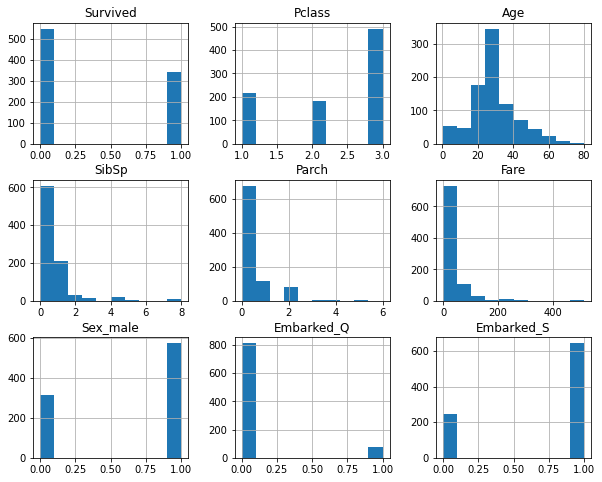

In [105]:
# Shows histogram of variable of train
train.hist(figsize=(10,8));

<AxesSubplot:xlabel='Age'>

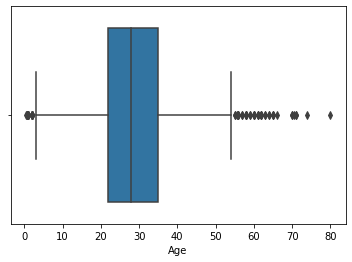

In [106]:
# Check Outliers in Age
sns.boxplot(train.Age)

<AxesSubplot:xlabel='Fare'>

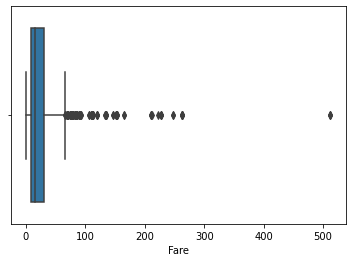

In [107]:
# Check Outliers in Fare
sns.boxplot(train.Fare)

In [108]:
# train Profile Report 
#pandas_profiling.ProfileReport(train)

### test

In [109]:
# Calculation of the mean of the columns of test
test.mean()

Pclass         2.265550
Age           29.599282
SibSp          0.447368
Parch          0.392344
Fare          35.576535
Sex_male       0.636364
Embarked_Q     0.110048
Embarked_S     0.645933
dtype: float64

In [110]:
# Calculation of the median of the columns of test
test.median()

Pclass         3.0000
Age           27.0000
SibSp          0.0000
Parch          0.0000
Fare          14.4542
Sex_male       1.0000
Embarked_Q     0.0000
Embarked_S     1.0000
dtype: float64

In [111]:
# Calculation of the moda of the columns of test
test.mode()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,27.0,0,0,7.75,1,0,1


In [112]:
# Summary statistics of test
test.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,29.599282,0.447368,0.392344,35.576535,0.636364,0.110048,0.645933
std,0.841838,12.703770,0.896760,0.981429,55.850103,0.481622,0.313324,0.478803
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,3.000000,27.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,3.000000,35.750000,1.000000,0.000000,31.471875,1.000000,0.000000,1.000000
max,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000


In [113]:
# test Profile Report 
#pandas_profiling.ProfileReport(test)

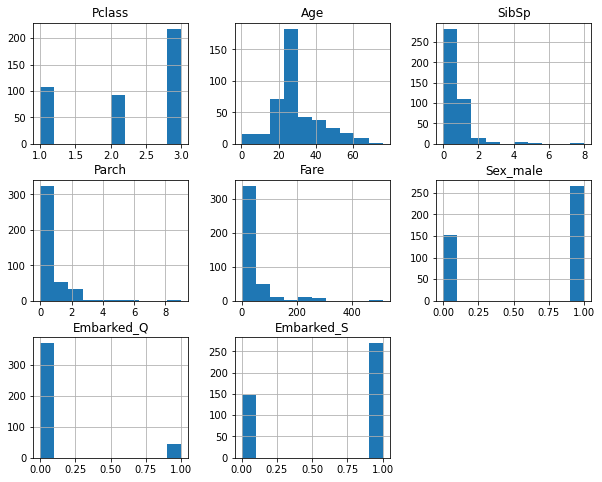

In [114]:
# Shows histogram of variable of test
test.hist(figsize=(10,8));

### target

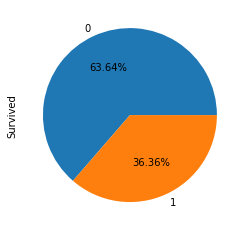

In [115]:
# target variable 
target['Survived'].value_counts().plot.pie(autopct='%1.2f%%');

# Modeling

In [123]:
# Define datasets for train
y_train = train['Survived']
X_train = train.drop(columns=['Survived'])

# Define datasets for test
y_test = target
X_test = test

In [124]:
# Creates a base model for comparison
base_classifier = DummyClassifier()

# Verifys accuracy of classifier
scores = cross_validate(base_classifier, X_train, y_train, return_train_score=False, scoring=['accuracy'])

# Shows average accuracy
scores['test_accuracy'].mean()

0.6161634548992531

In [125]:
# Creates the pipelines for the classifiers

# Logistic Regression
pipe_lr = Pipeline([('std1', StandardScaler()),
                    ('lr', LogisticRegression(random_state=42))])

# SVC
pipe_svc = Pipeline([('std2', StandardScaler()),
                     ('svc', SVC(random_state=42))])

# KNN
pipe_knn = Pipeline([('std3', StandardScaler()),                        
                     ('knn', KNeighborsClassifier(n_neighbors=2))])

# Neural Network MLP
pipe_mlp = Pipeline([('std4', StandardScaler()),                        
                     ('mlp', MLPClassifier(random_state=42))])

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
# pipe_dt = Pipeline([('std4', StandardScaler()),                        
#                      ('mlp', DecisionTreeClassifier(random_state=42))])

# Random Forest
rf = RandomForestClassifier(random_state=42)
# pipe_rf = Pipeline([('std4', StandardScaler()),                        
#                      ('mlp', RandomForestClassifier(random_state=42))])

# # XGBoost
# xgb = xgb.XGBClassifier(random_state=42)

In [126]:
# Evaluation
models = [pipe_lr, pipe_svc, pipe_knn, pipe_mlp, dt, rf]

models_name = {
    0: 'Logistic Regression', 
    1: 'SVC', 
    2: 'KNN',                
    3: 'MLP', 
    4: 'Decision Tree', 
    5: 'Random Forest'
}

kfold = model_selection.KFold(n_splits=3, random_state=42, shuffle=True)

best_accuracy = 0.0

for i, model in enumerate(models):        
    model.fit(X_train, y_train)    
    cv_results = cross_validate(
        model, X_train, y_train, cv=kfold, return_train_score=False, scoring=['accuracy']
    )
    
    print(f"{models_name[i]:20}: {cv_results['test_accuracy'].mean()}")
    
    if cv_results['test_accuracy'].mean() > best_accuracy:        
        best_accuracy = cv_results['test_accuracy'].mean()  
        best_model = model
        best_classifier = i
        
print(f'\nClassifier with best accuracy: {models_name[best_classifier]}')

Logistic Regression : 0.7867564534231201
SVC                 : 0.8181818181818182
KNN                 : 0.7811447811447811
MLP                 : 0.8159371492704826
Decision Tree       : 0.7721661054994389
Random Forest       : 0.7968574635241302

Classifier with best accuracy: SVC


# Submission

In [127]:
# Create X_train, y_train, X_test and y_test e Delete the column "Survived" of train (X_train)
y_train = train['Survived']
X_train = train.drop(columns=['Survived'])

y_test = target
X_test = test

In [128]:
y_pred = best_model.predict(test)

In [129]:
submission = pd.DataFrame({
    "PassengerId": passegerId,
    "Survived": y_pred
})

In [131]:
submission.to_csv('./submission.csv', index=False)